In [29]:
import random
import math
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from sympy import ordered

In [30]:
def ode_model(contamination,t,r,C,m,g):
	
	Contamination = contamination;
	
	return(r*(1-Contamination/C)-m*math.exp(-g*t)*Contamination)

# Extract specific time-ppints from ODE
def deterministic_run(precision,initial_contamination,r,C,m,g):
    tmax = 24
            
    time_space = np.linspace(0,tmax,precision+1)
    
    sim=odeint(ode_model,initial_contamination,time_space,args=(r,C,m,g))
    
    num_at_0=initial_contamination
    num_at_1=sim[int(precision*1.0/tmax)]
    num_at_2=sim[int(precision*2.0/tmax)]
    num_at_4=sim[int(precision*4.0/tmax)]
    num_at_8=sim[int(precision*8.0/tmax)]
    num_at_24=sim[int(precision*24.0/tmax)]
    
    return([num_at_0,num_at_1,num_at_2,num_at_4,num_at_8,num_at_24])

# Import the data


In [31]:
df = pd.read_csv("Posterior_Beth_Expt.txt")
#create headers for the dataframe r', 'C', 'mu-detergent' 'gamma-detergent' 'mu-disinfectant' 'gamma-disinfectant' 'mu-distilled-water' 'gamma-distilled-water':
df.columns = ['r','C','mu-detergent','gamma-detergent','mu-disinfectant','gamma-disinfectant','mu-distilled-water','gamma-distilled-water']


In [32]:
# Store Experimental data: Detergent, Disinfectant, Control and Distilled Water

Detergent_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)] #surface, phase
Detergent_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Disinfectant_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Disinfectant_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Control_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Control_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]

Distilled_Means=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]
Distilled_SD=[[np.zeros((1,6)) for i in range(1)] for j in range(1)]


# We store Detergent[Surface][Phase]

# Detergent for the Locker. Phases 1,2,3. 
Detergent_Means[0][0] = [221.6,94.3,56.25,1.75,1.6,8.5]
Detergent_SD[0][0] = [76.4,86.9,89.4,0.5,2.3,4.04]

Disinfectant_Means[0][0] = [59.4,18.7,5.4,5.4,2.4,8.6]
Disinfectant_SD[0][0] = [91.8,26.2,2.30,4.67,4.34,4.28] 

Distilled_Means[0][0] = [261.0,175.5,47,18.6,12.8,56]
Distilled_SD[0][0] = [31.5,61.7,9.0,13.2,78.2,76.4]

Control_Means[0][0] = [59.4,41,52,18.6,21,16.5]
Control_SD[0][0] = [23.5,9.9,21.7,13.2,16.2,6.54]


# Plot Detergent

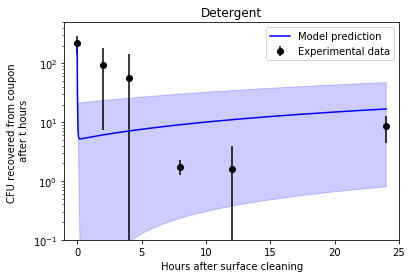

In [33]:
#Plot errorbars of experiments with predictions ontop

precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#1. Detergent
initial_contamination=Detergent_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].mean(),df["C"].mean(),df["mu-detergent"].mean(),df["gamma-detergent"].mean()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu-detergent"].quantile(0.05),df["gamma-detergent"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu-detergent"].quantile(0.95),df["gamma-detergent"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,2,4,8,12,24])

#Define new sd just for plotting to avoid SD value at 0
s = Detergent_SD[0][0]
measurement_data = Detergent_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='blue')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(0.1,500)
plt.ylabel("CFU recovered from coupon \n after t hours")
plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Detergent")

#save the plot
plt.savefig("abc_prediction_BethExpt_detergent.png", dpi=600)

plt.show()

# Plot Disinfectant

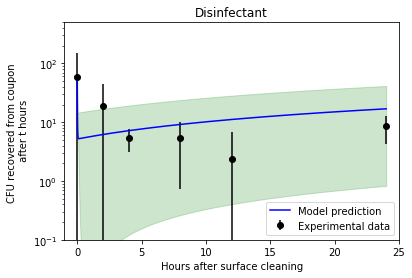

In [34]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. disinfectant
initial_contamination=Disinfectant_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].mean(),df["C"].mean(),df["mu-disinfectant"].mean(),df["gamma-disinfectant"].mean()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu-disinfectant"].quantile(0.05),df["gamma-disinfectant"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu-disinfectant"].quantile(0.95),df["gamma-disinfectant"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,2,4,8,12,24])

#Define new sd just for plotting to avoid SD value at 0
s = Disinfectant_SD[0][0]
measurement_data = Disinfectant_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='green')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(0.1,500)
plt.ylabel("CFU recovered from coupon \n after t hours")
plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="lower right")
plt.title("Disinfectant")
#save the plot
plt.savefig("abc_prediction_BethExpt_disinfectant.png", dpi=600)

plt.show()


# Distilled water

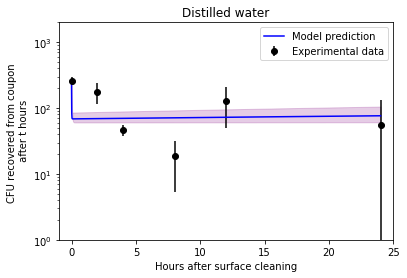

In [35]:
precision=5000
tmax = 24
time_space = np.linspace(0,tmax,precision+1)

#2. disinfectant
initial_contamination=Distilled_Means[0][0][0]
P=odeint(ode_model,initial_contamination,time_space,args=(df["r"].mean(),df["C"].mean(),df["mu-distilled-water"].mean(),df["gamma-distilled-water"].mean()))
Pmin=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.05),df["C"].quantile(0.05),df["mu-distilled-water"].quantile(0.05),df["gamma-distilled-water"].quantile(0.05)))
Pmax=odeint(ode_model,initial_contamination,time_space,args=(df["r"].quantile(0.95),df["C"].quantile(0.95),df["mu-distilled-water"].quantile(0.95),df["gamma-distilled-water"].quantile(0.95)))

# create a vector of values between 0 and 6
x = np.array([0,2,4,8,12,24])

#Define new sd just for plotting to avoid SD value at 0
s = Distilled_SD[0][0]
measurement_data = Distilled_Means[0][0]#np.array([1200,134.0,202.0,294.0])

#Plot errobars of experimental data
plt.errorbar(x,measurement_data,yerr=s,fmt='o', color='black',label='Experimental data')

#Plot the model prediction
plt.plot(time_space,P,label="Model prediction",color='blue')

#Plot confidence intervals around the model prediction

plt.fill_between(time_space,np.concatenate(Pmin),np.concatenate(Pmax),alpha=0.2,color='purple')
#plt.plot(time_space,Pmin,label="Model prediction",color='red')
#plt.plot(time_space,Pmax,label="Model prediction",color='red')

#plt.fill_between(x, np.array(map(operator.sub, P["Contamination"], Pmin["Contamination"])), np.array(map(operator.add, P["Contamination"], Pmax["Contamination"])), color='b', alpha=.1)
plt.xlim(-1,25)
plt.ylim(1,2000)
plt.ylabel("CFU recovered from coupon \n after t hours")
plt.yscale("log")
plt.xlabel("Hours after surface cleaning")
plt.legend(loc="upper right")
plt.title("Distilled water")

#save the plot
plt.savefig("abc_prediction_BethExpt_distilled-water.png", dpi=600)

plt.show()

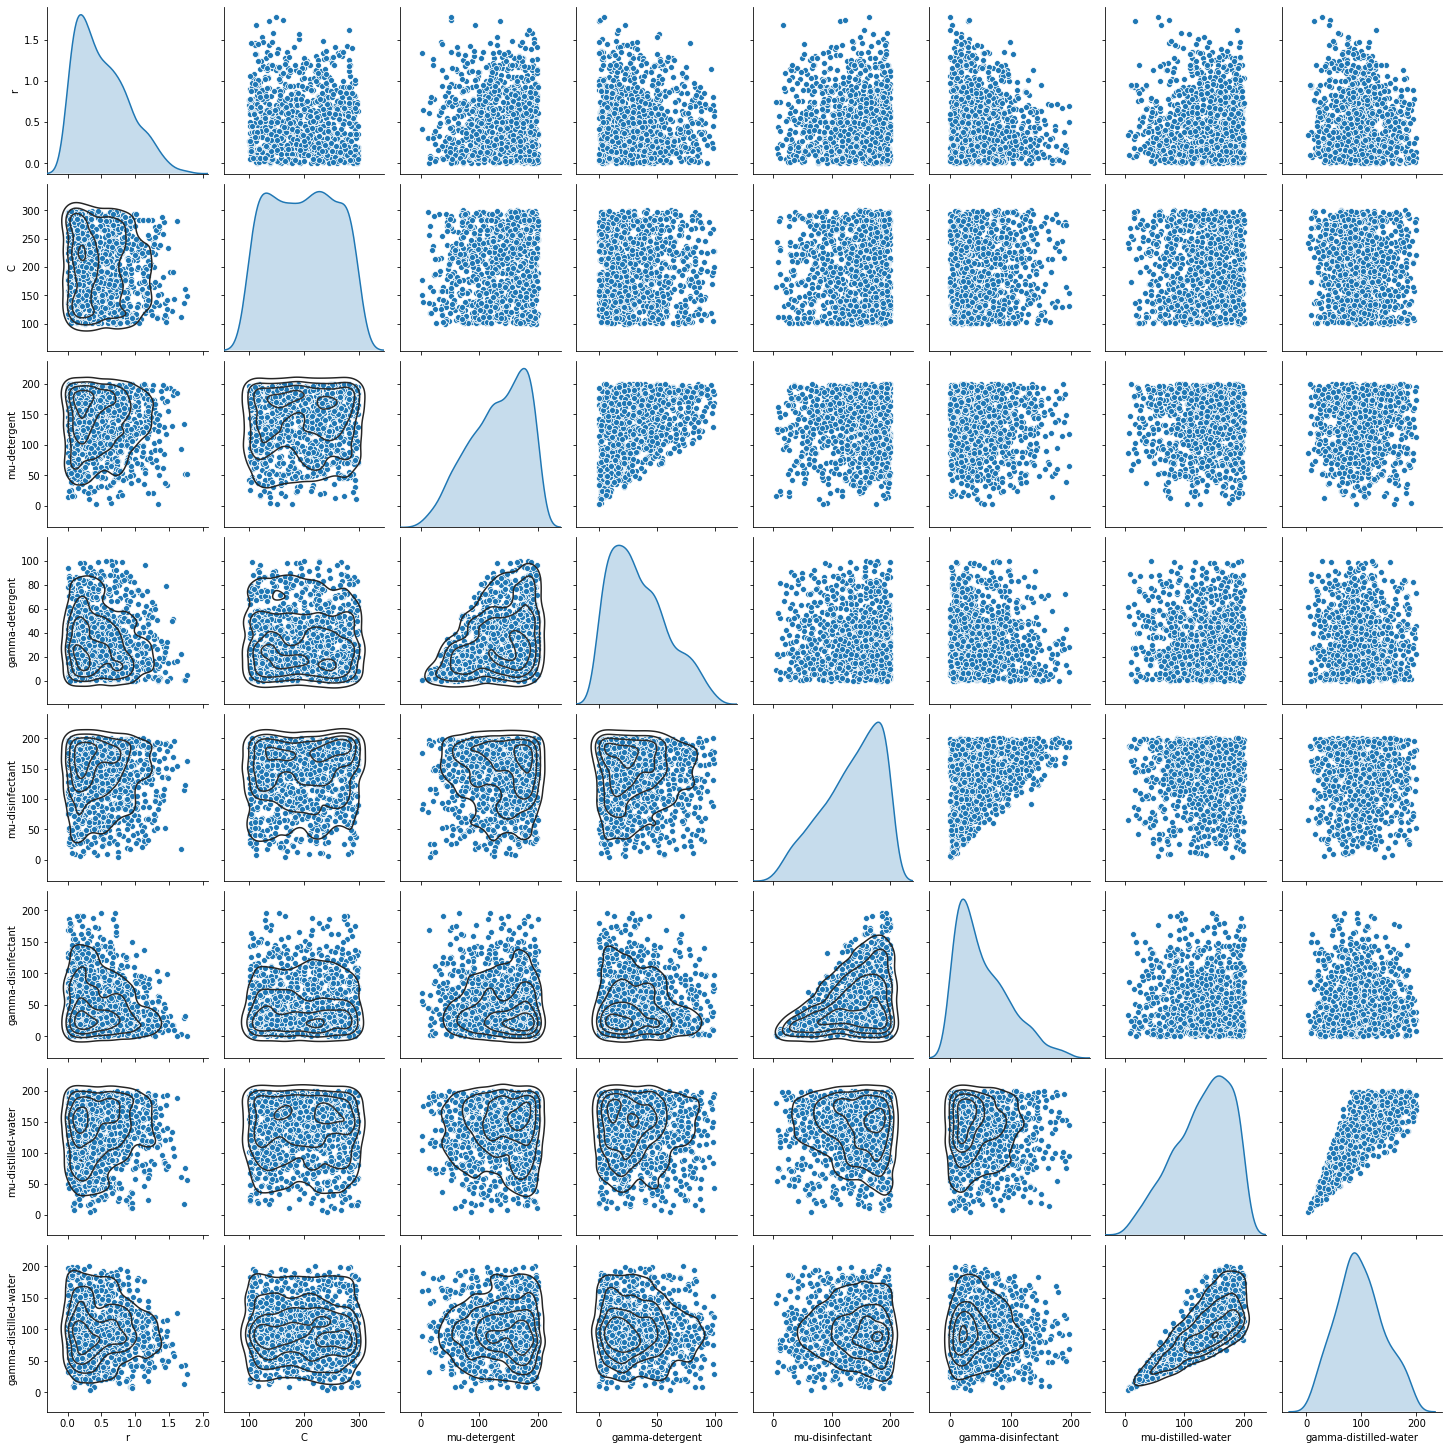

In [42]:
df.describe()

# Create pairplots of 50% of df
# make histograms in the diagonal with colour green 
# make scatterplots in the upper triangle with colour blue
g = sns.pairplot(df, diag_kind="kde",corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
